In [2]:
import pandas as pd
import numpy as np
from os import walk, makedirs
import matplotlib.pyplot as plt
from copy import deepcopy
from statistics import mean, stdev

In [3]:
csvout_dir = "csvout/problem2/"
x_runs_dirs = next(walk(csvout_dir))[1]

In [4]:
outputs = {}
for dir in x_runs_dirs:
  files = next(walk(csvout_dir+dir))[2]
  curr_run = list()
  colnames = ['thread']
  for i in range(1,13):
    colnames.append("pass_"+str(i))
  colnames.append("total_time")

  for file in files:
    col = pd.read_csv(f"{csvout_dir}{dir}/{file}").iloc[:, 1]
    times = col.values.tolist()
    append_list = [file]
    append_list.extend(times)
    curr_run.append(append_list)

  df = pd.DataFrame(np.row_stack(curr_run), columns=colnames)
  ## add to the list ##
  outputs.update({dir : df})

In [7]:
keys = list(outputs.keys())
keys.sort()
output_dict = {}
# plt.figure(figsize=(15, 5))
# plt.xlabel("average time taken")
# plt.xticks(rotation=90)
# plt.ylabel("time taken in ms")
# plt.title("times and shit")

colorlist = ['purple','orange','blue','red','green']
colorindex = 0
for key in keys:
  df = outputs.get(key)
  b_output = df.loc[(df["thread"]=='b_output.csv')]
  df = df.drop(b_output.index)
  #store in dick
  b = b_output.to_numpy()[0][1:].astype(float)
  a_mean = list()
  a_std = list()
  pass_stamps = deepcopy(colnames)
  pass_stamps.remove("thread")
  pass_stamps.remove("total_time")
  for col in pass_stamps:
    a_mean.append(mean(np.array(df[col]).astype(float)))
    a_std.append(stdev(np.array(df[col]).astype(float)))

  # plt.bar(pass_stamps,xaxis,color=colorlist[colorindex])
  # plt.errorbar(pass_stamps,xaxis,"o", yerr=ystd)#color=colorlist[colorindex])
  totalmean= mean(np.array(df["total_time"]).astype(float))
  totalstd= stdev(np.array(df["total_time"]).astype(float))
  # plt.plot("total_time",totalmean,"o",color=colorlist[colorindex])#, yerr=totalstd)

  dick = {
    'a_mean' : a_mean,
    'a_std' : a_std,
    'a_total_mean' : totalmean,
    'a_total_std' : totalstd,
    'b_main' : b[:-1],
    'b_total' : b[-1],
    'color' : colorlist[colorindex]
  }
  output_dict.update({key:dick})

  colorindex+=1

# plt.legend(keys)
# plt.figure(figsize=(50, 300))
# plt.show()

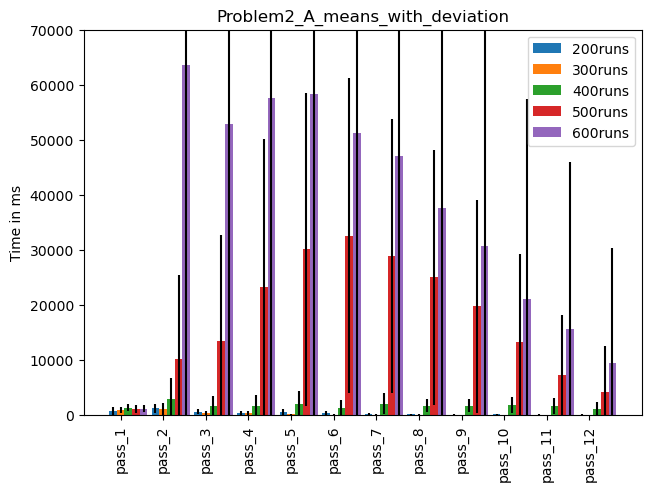

In [26]:
output_dict

x = np.arange(len(colnames)-2)  # the label locations
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
plt.xticks(rotation=90)

for key, value in output_dict.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, list(value.get('a_mean')), width, label=key, yerr=list(value.get('a_std')))
  # rects = ax.bar(x + offset, list(value.get('a_mean')), width, label=key)
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.set_ylabel('Time in ms')
ax.set_title('Problem2_A_means_with_deviation')
ax.set_xticks(x + width, pass_stamps)
ax.legend(keys)
ax.set_ylim(0, 70000)

plt.show()